# 4.4 連続型確率分布

In [2]:
using Distributions
using PyPlot

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 4.4.5 ベータ分布

In [4]:
# パラメータ
α = 0.5
β = 0.5
d = Beta(α, β)

Beta{Float64}(α=0.5, β=0.5)

In [5]:
# サンプリング
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 0.135906  0.484307  0.150812  0.160666  …  0.0926894  0.212118  0.859443

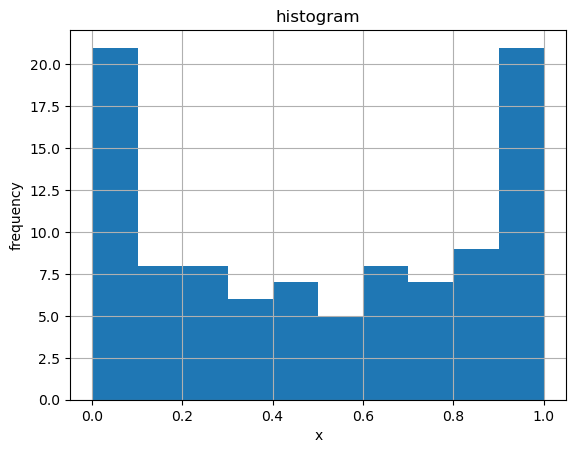

In [6]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram")

In [7]:
println("mean(exact) = $(mean(d)), mean(approx) = $(mean(X))")

mean(exact) = 0.5, mean(approx) = 0.5012973573354071


In [8]:
println("var(exact) = $(var(d)), var(approx) = $(var(X))")

var(exact) = 0.125, var(approx) = 0.12447247905394497


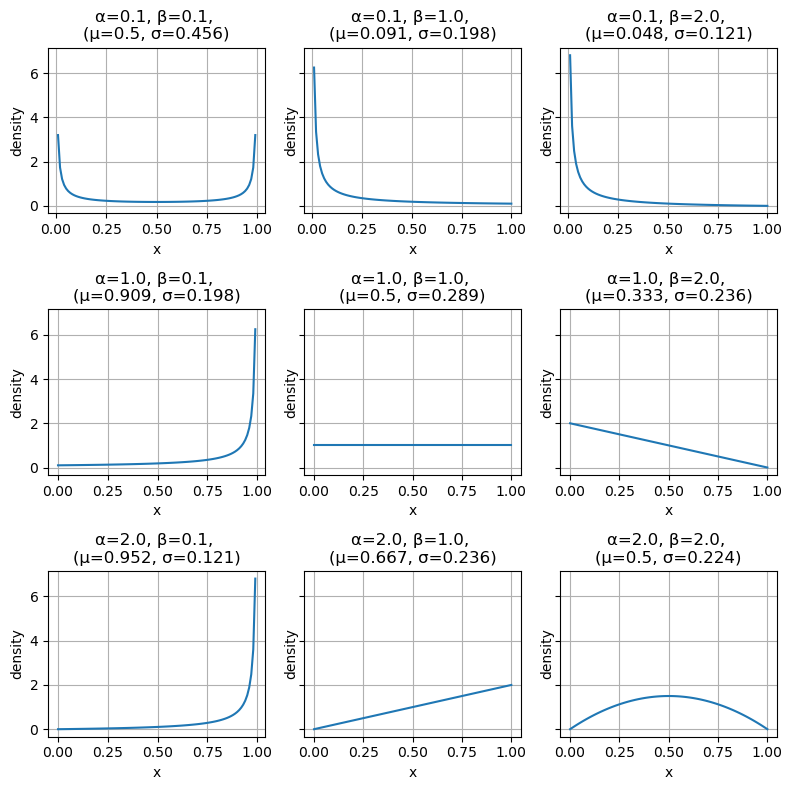

In [9]:
xs = range(0, 1, length=100)

# パラメータのリスト
αs = [0.1, 1.0, 2.0]
βs = [0.1, 1.0, 2.0]
fig, axes = subplots(length(αs), length(βs), sharey=true, figsize=(8,8))

for (i, α) in enumerate(αs)
    for (j, β) in enumerate(βs)
        d = Beta(α, β)
        μ, σ = mean(d), std(d)
        axes[i,j].plot(xs, pdf.(d, xs))
        set_options(axes[i,j], "x", "density",
                    "α=$(α), β=$(β), \n" *
                    "(μ=$(round(μ, digits=3)), σ=$(round(σ, digits=3)))")
    end
end
tight_layout()